[Источник](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

# Одномерная деревня

##### Выполнил: :ЖЕНЯ ЛАГУТИН

##### Баллов:   /50

Далее речь пойдет о полностью вымышленном мире, в котором возможны одномерные деревни и прочие привратности судьбы.
Пусть у нас есть одномерная деревня, в которой $N$ домов располагаются на отрезке от $0$ до $l$ км.

In [49]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
from matplotlib import animation

Для Вашего удобства ниже написана функция, которая рисует небольшую одномерную деревню.

In [2]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

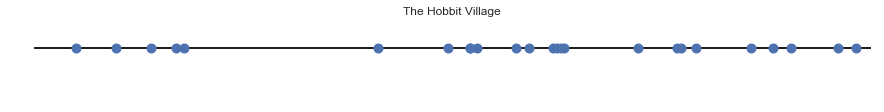

In [3]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

Жители одномерной деревни хотят подключиться к интернету, для этого им необходимо поставить центральную обслуживающую станцию, от которой кабель будет тянуться ко всем домам деревни. Пусть цена кабеля, который надо тянуть от станции до каждого дома независимо, определяется некоторой функцией $p(d)$. Тогда ясно, что деревне придется заплатить следующую сумму за доступ в мировую паутину:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
Здесь $w$ - координата станции, $x_i$ - координата i-ого домика.

## Задача 1 (1)
Найдите аналитически оптимальную позицию $w^*$, доставляющую минимум функции $P(w, x)$ при условии, что $p(d) = d^2$

$$\dfrac{dP(w,\mathbf{x})}{dw} = \sum\limits_{i=1}^n\dfrac{dp(|w-x_i|)}{dw} = 2\sum\limits_{i=1}^n (w-x_i) = 0$$
$$w = \frac{1}{n}\sum\limits_{i=1}^n x_i$$

## Задача 2 (2)
Напишите функцию `P`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение функции потерь $P$.

In [4]:
def P(w, x):
    x_np = np.array(x)
    return np.linalg.norm(w - x_np, ord=2)

Постройте значение функции потерь для значения координат от $0$ до $l$.

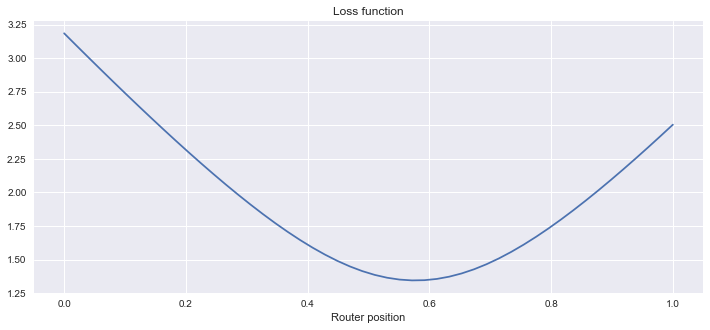

In [5]:
w = np.linspace(0,l)
p = [P(w_i, x) for w_i in w]
plt.title('Loss function')
plt.xlabel('Router position')
plt.plot(w,p)
fig = plt.gcf()
fig.set_size_inches(12, 5)

## Задача 3 (2)
Напишите функцию `dP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение градиента функции потерь $\nabla P$ как функции от $w$.

In [6]:
def dP(w, x):
    x_np = np.array(x)
    return 2 * sum(w - x_np)

Постройте значение функции `dP` для значения координат от $0$ до $l$. Какая точка на графике представляет особый интерес? Почему?

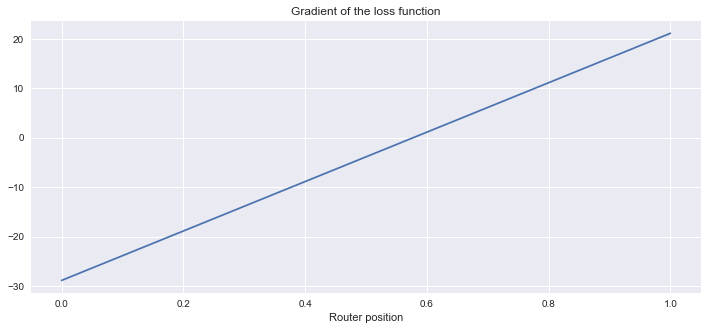

In [7]:
w = np.linspace(0,l)
dp = [dP(w_i, x) for w_i in w]
plt.title('Gradient of the loss function')
plt.xlabel('Router position')
plt.plot(w,dp)
fig = plt.gcf()
fig.set_size_inches(12, 5)

видимо, точка, где производная - ноль.

## Задача 4 (2)
Напишите функцию `gradient_descent`, которая возвращает значение $w_k$ через фиксированное число шагов. Длина функции не должна превышать 5 строчек кода.

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [8]:
def gradient_descent(dP, w0, mu, Nsteps):
    for step in range(Nsteps):
        w0 = w0 - mu * dP(w0, x)
    return w0

## Задача 5 (2)
Модифицируйте функцию `gradient_descent` так, чтобы она возвращала всю траекторию оптимизации (все значения $w_k$). Постройте графики $P(w_k ,x)$ для $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$ . Сделайте выводы.

Зачем строить графики $P(w_k, x)$??

In [9]:
def gradient_descent(dP, w0, mu, Nsteps):
    trajectory = [w0]
    w = w0
    for step in range(Nsteps):
        w = w - mu * dP(w, x)
        trajectory.append(w)
    return trajectory

In [10]:
N = 6
l = 1
x = np.random.rand(N)*l

In [11]:
%%capture
import matplotlib.animation
from IPython.display import HTML

def make_animation (mu=0.01, optim=gradient_descent, x=x, w0=1, N_iter=7):
    x_min, x_max = -1, 2
    y_min, y_max = 0, 7
    if optim == gradient_descent:
        w = gradient_descent(dP, w0, mu, N_iter)
    elif optim == newton_descent:
        w = newton_descent(P, dP, ddP, w0, N_iter)
    elif optim == stochastic_gradient_descent:
        w = stochastic_gradient_descent(P, dP_sigma, w0, mu, N_iter)
        
    fig, ax = plt.subplots(figsize=(6,4))
    xdata = np.linspace(0, 1)
    ydata = [P(w, x) for w in xdata]
    plt.plot(xdata, ydata)
    # plt.title('Сходимость метода Ньютона для y = x**4')
    line, = ax.plot([], [], marker='o', linestyle='-', color='r', label=optim.__name__, lw=2)
    plt.legend()
    # ax.grid()
    xdata, ydata = [w0], [P(w0, x)]

    def data_gen(t=0):
        cnt = 0
        #x = w_0
        while cnt < N_iter:
            cnt += 1
            yield w[cnt - 1]

    def init():
        ax.set_ylim(y_min, y_max)
        ax.set_xlim(x_min, x_max)
        line.set_data(xdata, ydata)
        return line,

    def run(data):
        #print(data)
        # update the data
        xdata.append(data)
        ydata.append(P(data, x))
        line.set_data(xdata, ydata)
        return line,

    ani = matplotlib.animation.FuncAnimation(fig, run, data_gen, blit=False, interval=1000,
                              repeat=True)
    return ani

In [12]:
%%capture
ani = {}
mu = [0.01, 0.1, 0.15, 0.19, 0.20, 0.21]
for val in mu:
    ani[val] = make_animation(val, gradient_descent)

In [13]:
anime = lambda ani: HTML(ani.to_jshtml())

In [14]:
anime(ani[0.01])

In [15]:
anime(ani[0.1])

In [16]:
anime(ani[0.15])

In [17]:
anime(ani[0.19])

In [18]:
anime(ani[0.20])

## Задача 6 (2)
Напишите функцию `ddP`, которая берет на вход позицию станции $w$ и вектор координат $x$ и возвращает значение гессиана функции потерь $\nabla^2 P$ как функции от $w$.

In [19]:
def ddP(w, x):
    

    return 2 * len(x)

Постройте значение функции `ddP` для значения координат от $0$ до $l$.

Чего???? Это ж константа..

## Задача 7 (3)
Напишите функцию `newton_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов.

In [20]:
def newton_descent(P, dP, ddP, w0, Nsteps):
    trajectory = [w0]
    w = w0
    for step in range(Nsteps):
        w = w - dP(w, x) / ddP(w, x)
        trajectory.append(w)
    return trajectory

Сравните траекторию метода с траекторией градиентного спуска. Исследуйте поведение метода Ньютона в зависимости от разной стартовой точки $w_0$.

In [21]:
%%capture
N = 1000
x = np.random.rand(N)*l
w0 = np.random.rand(1)*l
ani = make_animation(optim=newton_descent, w0=w0, x=x)

In [22]:
anime(ani)

не зависит от начальной точки, фунция же - парабола

Давайте нарисуем оптимальное положение роутера в деревне хоббитцов:

In [23]:
def plot_village_with_internet(coordinates, router_coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (np.array(coordinates) <= l).all(), 'All the houses should be in the village'
    assert (np.array(router_coordinates) <= l).all(), 'Router should be in the village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('Modern Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)  
    
    # Draw routers
    y = np.zeros(np.shape(router_coordinates))
    plt.plot(router_coordinates,y,'*',ms = 50)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

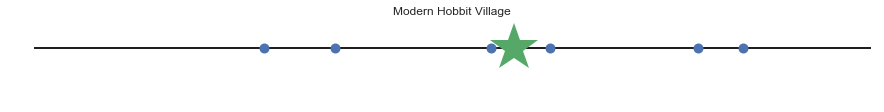

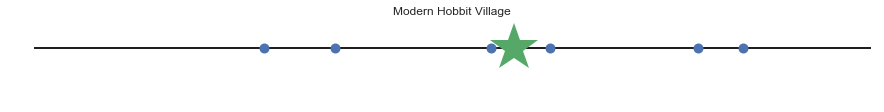

In [24]:
N = 6
l = 1
x = np.random.rand(N)*l

w_newton = newton_descent(P, dP, ddP, 0, 2)[-1]
w_grad = gradient_descent(dP, 0, 0.1, 5)[-1]

plot_village_with_internet(x, w_newton, l)
plot_village_with_internet(x, w_grad, l)

## Задача 8 (3)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов по методу стохастического градиентного спуска (градиент считается не по всем домикам деревни хоббитцов, а по случайному подмножеству)

In [25]:
# Stochastic Gradient
def dP_sigma(w, x, p=0.5):
    random_mask = np.random.binomial(1, p, x.shape)
    x_ = x[list(filter(lambda i: random_mask[i] == 1, list(range(x.shape[0]))))]
    return 2 * sum(w - x_)

def stochastic_gradient_descent(P, dP_sigma, w0, mu, Nsteps):
    w = w0
    trajectory = [w0]
    for step in range(Nsteps):
        w = w - mu * dP_sigma(w, x)
        trajectory.append(w)
    return trajectory

Увеличьте число домиков до $50$, сравните траектории алгоритмов градиентного и стохастического градиентного спуска. Сравните их.

Hint: придется изменить размер шага, чтобы работало:)

In [26]:
%%capture
N = 50
x = np.random.rand(N)*l
ani = make_animation(mu=0.005, optim=gradient_descent, w0=1, x=x)

In [27]:
anime(ani)

In [28]:
%%capture
N = 50
#x = np.random.rand(N)*l
ani = make_animation(mu=0.005, optim=stochastic_gradient_descent, w0=1, x=x)

In [29]:
anime(ani)

Только-только жизнь обитателей одномерной деревни наладилась, как роскомнадзор (казалось бы, какое ему дело) сказал, что цена на кабель должна считаться совсем по другой формуле: 
$$
p(d) = |d|
$$

## Задача 9 (3)
Напишите функции `P`, `dP`, `ddP` в новых реалиях. Постройте их для заданного $x$ при различных $w$.

In [30]:
def P(w, x):
    x_np = np.array(x)
    return np.linalg.norm(w - x_np, ord=1)

def dP(w, x):
    x_np = np.array(x)
    return sum(np.sign(w - x_np))

def ddP(w, x):
    
    return np.random.rand(1)*5+1 #:- )

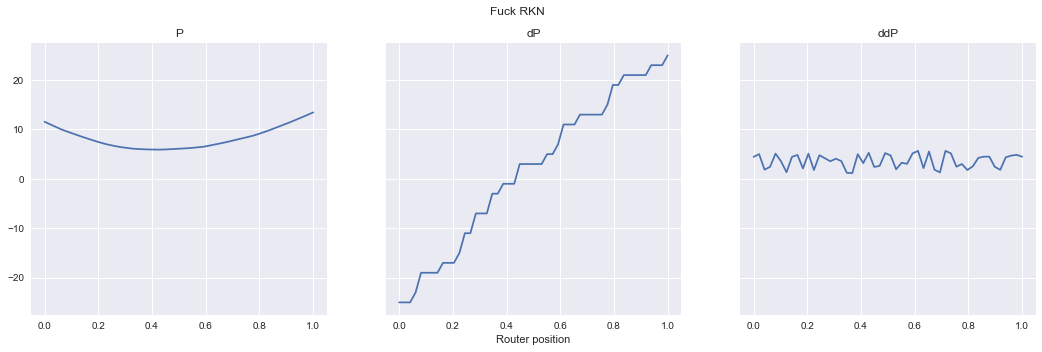

In [31]:
N = 25
x = np.random.rand(N)*l
w = np.linspace(0,l)

p = [P(w_i, x) for w_i in w]
dp = [dP(w_i, x) for w_i in w]
ddp = [ddP(w_i, x) for w_i in w]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(w,p)
ax1.set_title('P')
ax2.plot(w,dp)
ax2.set_title('dP')
ax3.plot(w,ddp)
ax3.set_title('ddP')
ax2.set_xlabel('Router position')
f.set_size_inches(18, 5)
f.suptitle('Fuck RKN')
plt.show()

Найдите оптимальное значение $w^*$ в новых реалиях.

$$0 \in \partial \sum\limits_{i=1}^n|w-x_i|\Rightarrow \sum\limits_{i:~ w\ne x_i}\mathbf{sign}(w-x_i) = 0$$
$$\begin{equation*}
w^* = 
 \begin{cases}
   x_{i+1} &\text{if $\exists i \in \mathbb{N}: ~n=2i+1$}\\
   t \in [x_i,x_{i+1}]  &\text{if $\exists i \in \mathbb{N}: ~n=2i$}
 \end{cases}
\end{equation*}$$

## Задача 10 (2)
Постройте траекторию градиентного спуска в новых реалиях. Что Вы скажете роскомнадзору, когда он потребует решать эту задачу методом Ньютона (потому что они где то слышали, что надо использовать лучшие мировые практики)?

In [32]:
%%capture
N = 50
x = np.random.rand(N)*l
ani = make_animation(mu=0.005, optim=gradient_descent, w0=1, x=x)

In [33]:
anime(ani)

## Задача 11 (3)
Реализуйте функции `dP_sigma`, `stochastic_gradient_descent` в новых реалиях.

In [34]:
def dP_sigma(w, x, p=0.1):
    random_mask = np.random.binomial(1, p, x.shape)
    x_ = x[list(filter(lambda i: random_mask[i] == 1, list(range(x.shape[0]))))]
    return dP(w,x_)

def stochastic_gradient_descent(P, dP_sigma, w0, mu, Nsteps):
    w = w0
    trajectory = [w0]
    for step in range(Nsteps):
        w = w - mu * dP_sigma(w, x)
        trajectory.append(w)
    return trajectory

Постройте траектории градиентного и стохастического градиентного спуска. Поэксперементируйте с уровнем шума в стох. градиенте путем изменения доли домиков, по которым считается градиент ($p$). Проведите эксперименты для большого числа домиков (от $10000$) и сравните результаты.

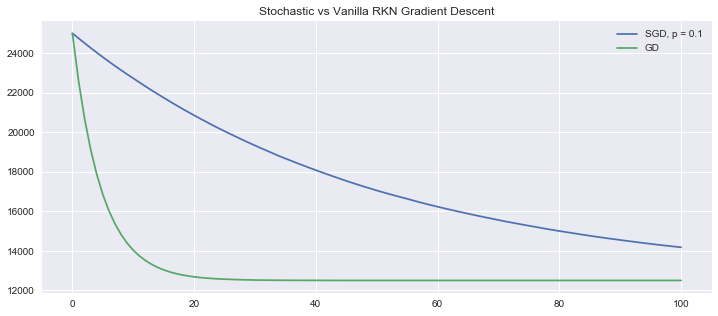

In [35]:
N = 50000
l = 1
x = np.random.rand(N)*l
mu = 1e-6

list_gr = gradient_descent(dP, 0, mu, 100)
P_gr =[P(w_, x) for w_ in list_gr]

list_sgd = stochastic_gradient_descent(P, dP_sigma, 0, mu, 100)
P_sgd =[P(w_, x) for w_ in list_sgd]

plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD, p = 0.1')
plt.plot(P_gr, label='GD')
plt.legend()
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(12, 5)

Дела шли своим чередом в деревне хоббитцов. Однако, как и всякое процветающее общество (коим без всяких сомнений себя считали хоббитцы), они решили, что их количество увеличилось достаточно для того, чтобы поставить второй датацетр (роутер) и проводить интернет к каждому дому от ближайшего к нему роутера.
$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

## Задача 12 (2)
Напишите функции `P`, `dP` в новых реалиях. Постройте их для заданного $x$ при различных $w_1, w_2$. Помните, что градиент в этом случае представляет собой двумерный вектор.

In [36]:
def P(w, x):
    w1, w2 = w
    x_np = np.array(x)
    return sum(np.amin([np.abs(w1 - x_np),np.abs(w2 - x_np)], axis=0))

def dP(w, x):
    w1, w2 = w
    x_np = np.array(x)
    mask1 = np.sign(np.abs(w1 - x_np) - np.abs(w2 - x_np))
    mask2 = np.sign(w1 - x_np)
    mask3 = np.sign(w2 - x_np)
    mask = np.array([mask1, mask2, mask3]).T
    dp1 = sum(list(map(lambda y: y[1] if y[0] == -1 else (y[1]/2 if y[0] == 0 else 0), mask)))
    dp2 = sum(list(map(lambda y: y[2] if y[0] == 1 else (y[2]/2 if y[0] == 0 else 0), mask)))
    return np.array([dp1, dp2])

Постройте графики $P(w_1, w_2), \nabla P(w_1, w_2)$ для различных значений $N$. Прокомментируйте, что происходит по мере увеличения $N$.

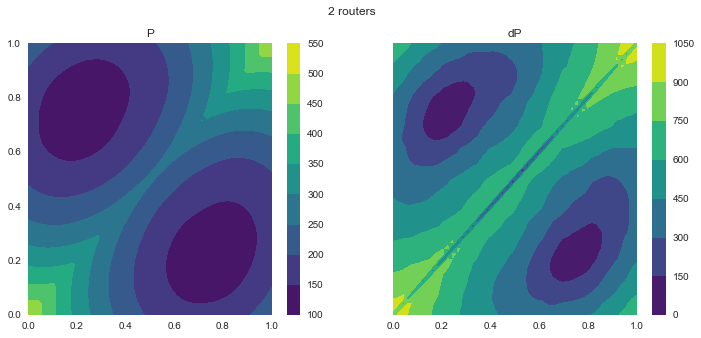

In [37]:
N = 1000
l = 1
x = np.random.rand(N)*l

w1 = np.linspace(0,l)
w2 = np.linspace(0,l)
def p_dp_matrix(w1, w2):
    p = np.zeros([w1.shape[0], w1.shape[0]])
    dp = np.zeros([w1.shape[0], w1.shape[0]])

    i = 0
    for w1_ in w1:
        j = 0
        for w2_ in w2:
            p[i][j]  =  P([w1_, w2_], x)
            dp[i][j] = np.linalg.norm(dP([w1_, w2_], x))
            j += 1
        i += 1
    return p, dp
p, dp = p_dp_matrix(w1, w2)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

f.set_size_inches(12, 5)
f.suptitle('2 routers')
plt.show()

## Задача 13 (4)
Напишите функцию `gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [38]:
def gradient_descent(P, dP_sigma, w0, mu, Nsteps):
    w01, w02 = w0
    trajectory = [[w01], [w02]]
    w1, w2 = w01, w02
    for step in range(Nsteps):
        w1, w2 = np.array([w1, w2]) - mu * dP([w1, w2], x)
        trajectory[0].append(w1)
        trajectory[1].append(w2)
    trajectory = np.array(trajectory)
    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)

    t = np.arange(Nsteps)

    def update_quiver(j, ax, fig):
        t = trajectory[:,:j]
        Q = ax1.quiver(t[0,:-1], t[1,:-1], t[0,1:]-t[0,:-1], \
                       t[1,1:]-t[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
        Q2 = ax2.quiver(t[0,:-1], t[1,:-1], t[0,1:]-t[0,:-1], \
                       t[1,1:]-t[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
        return Q,Q2,

    def init_quiver():
        #global Q
        Q = ax1.plot(x=trajectory[0,0], y=trajectory[1,0], marker='o', markersize=10, color = 'k')
        Q2 = ax2.plot(x=trajectory[0,0], y=trajectory[1,0], marker='o', markersize=5, color = 'k')
        return  Q,Q2,
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')
    f.set_size_inches(12, 5)
    f.suptitle('2 routers')

    ani = animation.FuncAnimation(f, update_quiver, 
                              frames = range(0,Nsteps),
                              init_func=init_quiver,
                              interval=300,fargs=(ax1, f))

    return trajectory, ani

In [39]:
#w01 and w02 shouldn't be equal

In [50]:
%%capture
trajectory, ani = gradient_descent(P, dP_sigma, [0.1, 0.2], mu=3e-4, Nsteps=40)

In [51]:
anime(ani)

## Задача 14 (4)
Напишите функцию `stochastic_gradient_descent`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

In [52]:
def animated_quiver(f, ax1, ax2, trajectory, Nsteps):
    def update_quiver(j, ax, fig):
        t = trajectory[:,:j]
        Q = ax1.quiver(t[0,:-1], t[1,:-1], t[0,1:]-t[0,:-1], \
                       t[1,1:]-t[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
        Q2 = ax2.quiver(t[0,:-1], t[1,:-1], t[0,1:]-t[0,:-1], \
                       t[1,1:]-t[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
        return Q,Q2,
    def init_quiver():
        #global Q
        Q = ax1.plot(x=trajectory[0,0], y=trajectory[1,0], marker='o', markersize=10, color = 'k')

        Q2 = ax2.plot(x=trajectory[0,0], y=trajectory[1,0], marker='o', markersize=5, color = 'k')
        return  Q,Q2,
    ani = animation.FuncAnimation(f, update_quiver, 
                              frames = range(0,Nsteps),
                              init_func=init_quiver,
                              interval=300,fargs=(ax1, f))
    return ani

In [53]:
def stochastic_gradient_descent(P, dP, w0, mu, Nsteps):
    w01, w02 = w0
    trajectory = [[w01], [w02]]
    w1, w2 = w01, w02
    for step in range(Nsteps):
        random_mask = np.random.binomial(1, 0.1, x.shape)
        x_ = x[list(filter(lambda i: random_mask[i] == 1, list(range(x.shape[0]))))]
        w1, w2 = np.array([w1, w2]) - mu * dP([w1, w2], x_)
        trajectory[0].append(w1)
        trajectory[1].append(w2)
    trajectory = np.array(trajectory)
    
    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')
    f.set_size_inches(12, 5)
    f.suptitle('2 routers')
    ani = animated_quiver(f, ax1, ax2, trajectory, Nsteps)

    return trajectory, ani

In [54]:
%%capture
trajectory, ani = stochastic_gradient_descent(P, dP, w0=[0.1,0.2], mu=6e-4, Nsteps=40)

In [55]:
anime(ani)

## Задача 15 (4)
На практике Вам не так часто нужно будет писать свой собстенный алгоритм оптимизации. Решите поставленную выше задачу (2 станции, роскомнадзоровская норма) любым алгоритмом оптимизации из любой библиотеки Python. (cvxpy, scipy и т.д.)
Нарисуйте такие же анимашки.

In [56]:
%%capture
N = 1000
l = 1
x = np.random.rand(N)*l

def func(w, *args):
    return P(w, *args)

from scipy.optimize import minimize

w1 = np.linspace(0,1)
w2 = np.linspace(0,1)
p, dp = p_dp_matrix(w1, w2)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
c1 = ax1.contourf(w1, w2, p, cmap="viridis")
plt.colorbar(c1, ax = ax1)
ax1.set_title('P')
c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
plt.colorbar(c2, ax = ax2)
ax2.set_title('dP')

f.set_size_inches(12, 5)
f.suptitle('2 routers')

trajectory = []
def callback(w):
    trajectory.append(w)
trajectory = []
w0 = [0.2,0.3]
res = minimize(func, x0=w0,args=x, method='BFGS', \
               tol=1e-20, callback=callback)
trajectory = np.insert(trajectory, 0, w0, axis=0)
trajectory = np.array(trajectory).T

In [57]:
np.array(trajectory).T

array([[0.2       , 0.3       ],
       [0.10975868, 0.61635158],
       [0.22733986, 0.68931812],
       [0.23848982, 0.75390139],
       [0.224443  , 0.73691687],
       [0.22810819, 0.74150678],
       [0.23022171, 0.74028714],
       [0.22963333, 0.74045041],
       [0.22955984, 0.74045301],
       [0.22956123, 0.74042927]])

In [58]:
ani = animated_quiver(f, ax1, ax2, trajectory, len(trajectory[0]))
anime(ani)

Одномерная деревня научилась решать свои проблемы при любом числе и раположении жителей в мгновение ока. Улучшив качество интернета, хоббитцы смотрели онлайн-курсы и мемесы и жили припеваючи. Как Вы могли догадаться, роскомнадзору это не очень по душе. Вот тут то они выкатили новое требование о том, что дата-центры (роутеры) должны стоять не более, чем на расстоянии половины деревни друг от друга, чтобы силовым структурам было легче собирать информацию о том, как используют интернет жители деревни Одномерново.

$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

## Задача 16 (2)
Нарисуйте на плоскости допустимое множество решений. Выпукло ли оно?

Text(0.5,1,'Budget set')

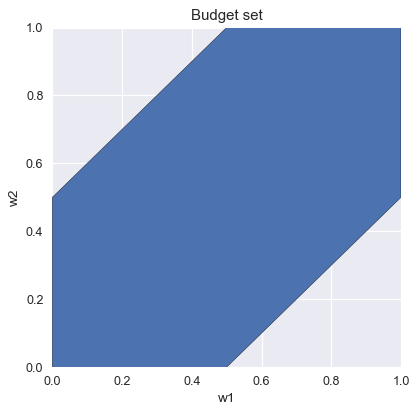

In [59]:
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

l = 1

fig = plt.figure(1, figsize=(5,5), dpi=90)
ring_mixed = Polygon([(0, 0), (0, l/2), (l/2, l),
    (l, l), (l, l/2), (l/2, 0)])
ax = fig.add_subplot(111)
ring_patch = PolygonPatch(ring_mixed)
ax.add_patch(ring_patch)
plt.xlabel('w1')
plt.ylabel('w2')
ax.set_title('Budget set')

ну да, выпукло

## Задача 17 (4)
Напишите функцию `conditional_SGD`, которая возвращает всю оптимизационную траекторию $(w_k)$ метода условного стохастического градиентного спуска через фиксированное число шагов и рисует процесс на графиках $P$ и $\nabla P$, что были выше (анимацию).

Метод условного градиентного спуска заключается в том, чтобы делать градиентный шаг, а после этого проверять принадлежность полученной точки целевому множеству. Если она ему принадлежит, то алгоритм продолжается, иначе делается ортогональная проекция на целевое множество.

In [77]:
def conditional_SGD(P, dP_sigma, w01, w02, mu, Nsteps):
    trajectory = [[w01], [w02]]
    w1, w2 = w01, w02
    w = [w1, w2]
    for step in range(Nsteps):
        random_mask = np.random.binomial(1, 0.1, x.shape)
        x_ = x[list(filter(lambda i: random_mask[i] == 1, list(range(x.shape[0]))))]
        w = np.array(w) - mu * dP(w, x_)
        if abs(w[0] - w[1]) < 0.5 and w[0] <= 1 and w[1] <= 1 and w[0] >= 0 and w[1] >=0:
                trajectory[0].append(w[0])
                trajectory[1].append(w[1])
        else:
                if (w[0] < 0 and w[1] <= 0.5 and w[1] >= 0):
                    w[0] = 0
                elif (w[1] < 0 and w[0] >= 0 and w[0] <= 0.5):
                    w[1] = 0
                elif (w[0] < 0 and w[1] < 0):
                    w = [0,0]
                elif (w[0] > 1 and w[1] >= 0.5 and w[1] <= 1):
                    w[0] = 1
                elif (w[1] > 1 and w[0] >= 0.5 and w[0] <= 1):
                    w[1] = 1
                elif (w[0] > 1 and w[1] > 1):
                    w = [1,1]
                elif (w[1] < w[0] - 0.5 and w[1] < 0.5):
                    if (w[1] < -w[0] + 0.5):
                        w = [0.5, 0]
                    elif (w[1] > -w[0] + 1.5):
                        w = [1, 0.5]
                    else:
                        a1 = (w[0] + w[1] + 0.5)*0.5
                        a2 = (w[0] + w[1] - 0.5)*0.5
                        w = [a1, a2]
                elif (w[1] > w[0] + 0.5 and w[1] > 0.5):
                    if (w[1] < -w[0] + 0.5):
                        w = [0, 0.5]
                    elif (w[1] > -w[0] + 1.5):
                        w = [0.5, 1]
                    else:
                        a1 = (w[0] + w[1] - 0.5)*0.5
                        a2 = (w[0] + w[1] + 0.5)*0.5
                        w = [a1, a2]
        trajectory[0].append(w[0])
        trajectory[1].append(w[1])
    trajectory = np.array(trajectory)
    
    w1 = np.linspace(0,l)
    w2 = np.linspace(0,l)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    c1 = ax1.contourf(w1, w2, p, cmap="viridis")
    plt.colorbar(c1, ax = ax1)
    ax1.set_title('P')
    c2 = ax2.contourf(w1, w2, dp, cmap="viridis")
    plt.colorbar(c2, ax = ax2)
    ax2.set_title('dP')
    f.set_size_inches(12, 5)
    f.suptitle('2 routers')

    ani = animated_quiver(f, ax1, ax2, trajectory, len(trajectory[0]))

    return trajectory, ani

In [78]:
%%capture
trajectory, ani = conditional_SGD(P, dP, w01=0, w02=0.9, mu=6e-4, Nsteps=40)

In [80]:
anime(ani)

## Задача 18 (5)
Напишите функцию `multi_newton`, которая реализует решение двумерной задачи с $p(d) = d^3$ методом Ньютона и возвращает траекторию работы алгоритма. Сравните результаты для данной задачи с методом стохастического градиентного спуска.

In [81]:
def P(w, x):
    w1, w2 = w
    return sum(list(map(lambda y: np.abs(w1 - y)**3 if np.abs(w1 - y) < np.abs(w2 - y) else np.abs(w2 - y)**3, x)))

def dP(w, x):
    w1, w2 = w
    x_np = np.array(x)
    mask1 = np.sign(np.abs(w1 - x_np) - np.abs(w2 - x_np))
    mask2 = np.sign(w1 - x_np)
    mask3 = np.sign(w2 - x_np)
    mask = np.array([mask1, mask2, mask3, w1 - x_np, w2 - x_np]).T
    dp1 = sum(list(map(lambda y: y[1] * 3 * y[-2] ** 2 if y[0] == -1 else \
                       (y[1] * 3 * y[-2] ** 2 /2 if y[0] == 0 else 0), mask)))
    dp2 = sum(list(map(lambda y: y[2] * 3 * y[-1] ** 2 if y[0] == 1 else \
                       (y[1] * 3 * y[-1] ** 2 /2 if y[0] == 0 else 0), mask)))
    return np.array([dp1, dp2])

def ddP(w, x):
    w1, w2 = w
    x_np = np.array(x)
    mask1 = np.sign(np.abs(w1 - x_np) - np.abs(w2 - x_np))
    mask2 = np.sign(w1 - x_np)
    mask3 = np.sign(w2 - x_np)
    mask = np.array([mask1, mask2, mask3, np.abs(w1 - x_np), np.abs(w2 - x_np)]).T
    dp11 = sum(list(map(lambda y:  6 * y[-2] if y[0] == -1 else \
                       (3 * y[-2] if y[0] == 0 else 0), mask)))
    dp22 = sum(list(map(lambda y: 6 * y[-1] if y[0] == 1 else \
                       (3 * y[-1] if y[0] == 0 else 0), mask)))
    return np.array([[dp11, 0], [0, dp22]])

In [82]:
def multi_newton(P, dP, ddP, w0, Nsteps):
    w = w0
    w_ = []
    for i in range(Nsteps):
        w_.append(w)
        w = w - np.dot(np.linalg.inv(ddP(w,x)), np.array(dP(w,x)))
    w_.append(w)
    return w_

In [83]:
%%%capture
N = 50000
l = 1
x = np.random.rand(N)*l
mu = 1e-6

list_n = multi_newton(P, dP, ddP, [0.1,0.2], 20)
P_n =[P(w_, x) for w_ in list_n]

list_sgd,_ = stochastic_gradient_descent(P, dP, [0.1, 0.2], mu, 100)
P_sgd =[P(w_, x) for w_ in np.array(list_sgd).T]

In [84]:
%%%capture
list_gd,_ = gradient_descent(P, dP, [0.1, 0.2], mu, 100)
P_gd =[P(w_, x) for w_ in np.array(list_gd).T]

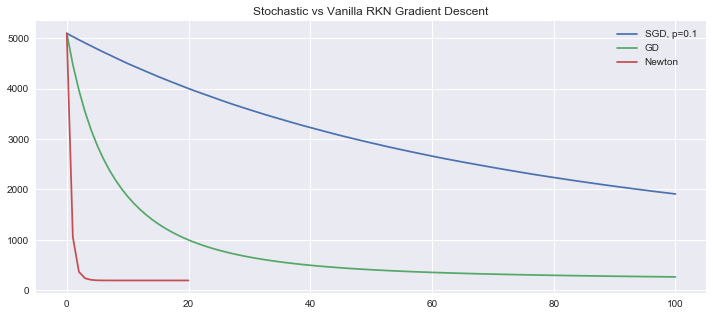

In [85]:
plt.title('Stochastic vs Vanilla RKN Gradient Descent')

plt.plot(P_sgd, label='SGD, p=0.1')
plt.plot(P_gd, label='GD')
plt.plot(P_n, label='Newton')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 5)